In [3]:
# Test basic imports
print("Testing Day 2 setup...")

# Test numpy
import numpy as np
print(f"NumPy version: {np.__version__}")
test_array = np.array([1, 2, 3])
print(f"NumPy test: {test_array}")

# Test pandas  
import pandas as pd
print(f"Pandas version: {pd.__version__}")
test_df = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
print("Pandas test:")
print(test_df)

print("✅ All imports working!")

Testing Day 2 setup...
NumPy version: 2.0.2
NumPy test: [1 2 3]
Pandas version: 2.2.3
Pandas test:
   A  B
0  1  3
1  2  4
✅ All imports working!


In [4]:
# Day 2: Pandas & Real Data Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic = pd.read_csv(url)

print(f"Dataset loaded successfully!")
print(f"Shape: {titanic.shape}")
print("\nFirst 5 rows:")
print(titanic.head())

print("\nColumn information:")
print(titanic.info())

Dataset loaded successfully!
Shape: (891, 12)

First 5 rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123      

In [5]:
# Data Exploration & Missing Values Analysis
print("=== DATA EXPLORATION ===")
print(f"Dataset shape: {titanic.shape}")
print(f"\nColumn names: {list(titanic.columns)}")
# Check data types
print(f"\nData types:")
print(titanic.dtypes)
# Missing data analysis
print(f"\n=== MISSING DATA ANALYSIS ===")
missing_count = titanic.isnull().sum()
missing_percent = (missing_count / len(titanic)) * 100
missing_info = pd.DataFrame({
    'Missing_Count': missing_count,
    'Missing_Percent': missing_percent}).sort_values('Missing_Percent', ascending=False)
print("Missing data summary:")
print(missing_info[missing_info.Missing_Count > 0])
# Basic statistics for numerical columns
print(f"\n=== NUMERICAL STATISTICS ===")
print(titanic.describe())

=== DATA EXPLORATION ===
Dataset shape: (891, 12)

Column names: ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

Data types:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

=== MISSING DATA ANALYSIS ===
Missing data summary:
          Missing_Count  Missing_Percent
Cabin               687        77.104377
Age                 177        19.865320
Embarked              2         0.224467

=== NUMERICAL STATISTICS ===
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    

In [6]:
# Data Cleaning and Feature Engineering
print("\n=== DATA CLEANING & FEATURE ENGINEERING ===")

# Create a clean copy of the DataFrame
titanic_clean = titanic.copy()

# 1. Handling Missing Values
# Fill 'Age' missing values with the median age of the passenger's class.
# This is a good way to impute (fill in) missing values using a related feature.
titanic_clean['Age'].fillna(titanic_clean.groupby('Pclass')['Age'].transform('median'), inplace=True)

# Fill 'Embarked' with the most common value (mode)
titanic_clean['Embarked'].fillna(titanic_clean['Embarked'].mode()[0], inplace=True)

# The 'Cabin' column has too many missing values, so we can drop it as it won't be useful
titanic_clean.drop('Cabin', axis=1, inplace=True)

# 2. Creating New Features (Feature Engineering)
# A simple yet powerful technique is to create a 'Family_Size' feature
titanic_clean['Family_Size'] = titanic_clean['SibSp'] + titanic_clean['Parch'] + 1

# Create an 'Is_Alone' feature based on family size
titanic_clean['Is_Alone'] = 0
titanic_clean.loc[titanic_clean['Family_Size'] == 1, 'Is_Alone'] = 1

# 3. Handling Categorical Data
# The 'Sex' column is categorical ('male', 'female'). We need to convert it to numerical.
titanic_clean['Sex'] = titanic_clean['Sex'].map({'male': 0, 'female': 1})

# A simple check to see the data is clean now
print("\nPost-cleaning info:")
titanic_clean.info()

print("\nFirst few rows of the clean data:")
print(titanic_clean.head())
print("\n✅ Data Cleaning and Feature Engineering completed!")


=== DATA CLEANING & FEATURE ENGINEERING ===

Post-cleaning info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  Family_Size  891 non-null    int64  
 12  Is_Alone     891 non-null    int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 90.6+ KB

First few rows of the clean data:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1     

C:\Users\Nidhi K N\AppData\Local\Temp\ipykernel_25652\1862631784.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_clean['Age'].fillna(titanic_clean.groupby('Pclass')['Age'].transform('median'), inplace=True)
C:\Users\Nidhi K N\AppData\Local\Temp\ipykernel_25652\1862631784.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on

In [7]:
# Select features (X) and target (y)
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Family_Size', 'Is_Alone']
X = titanic_clean[features]
y = titanic_clean['Survived']

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)

Features (X) shape: (891, 9)
Target (y) shape: (891,)


In [8]:
# Use get_dummies for one-hot encoding
X = pd.get_dummies(X, columns=['Embarked'], drop_first=True)

print("Features after one-hot encoding:")
print(X.head())
print("\nFinal feature shape:", X.shape)

Features after one-hot encoding:
   Pclass  Sex   Age  SibSp  Parch     Fare  Family_Size  Is_Alone  \
0       3    0  22.0      1      0   7.2500            2         0   
1       1    1  38.0      1      0  71.2833            2         0   
2       3    1  26.0      0      0   7.9250            1         1   
3       1    1  35.0      1      0  53.1000            2         0   
4       3    0  35.0      0      0   8.0500            1         1   

   Embarked_Q  Embarked_S  
0       False        True  
1       False       False  
2       False        True  
3       False        True  
4       False        True  

Final feature shape: (891, 10)


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape (X_train):", X_train.shape)
print("Testing set shape (X_test):", X_test.shape)
print("Training target shape (y_train):", y_train.shape)
print("Testing target shape (y_test):", y_test.shape)

Training set shape (X_train): (712, 10)
Testing set shape (X_test): (179, 10)
Training target shape (y_train): (712,)
Testing target shape (y_test): (179,)


C:\Users\Nidhi K N\AppData\Local\Temp\ipykernel_25652\561115756.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=titanic_clean, palette="viridis")


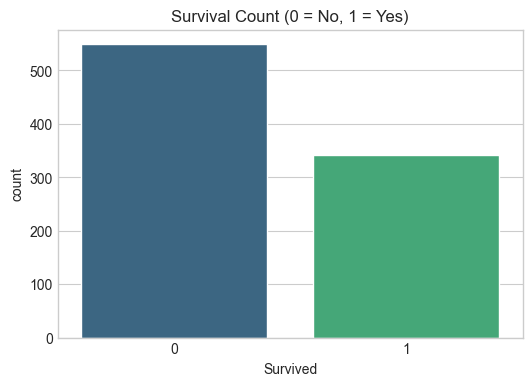

C:\Users\Nidhi K N\AppData\Local\Temp\ipykernel_25652\561115756.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Survived', data=titanic_clean, palette="mako")


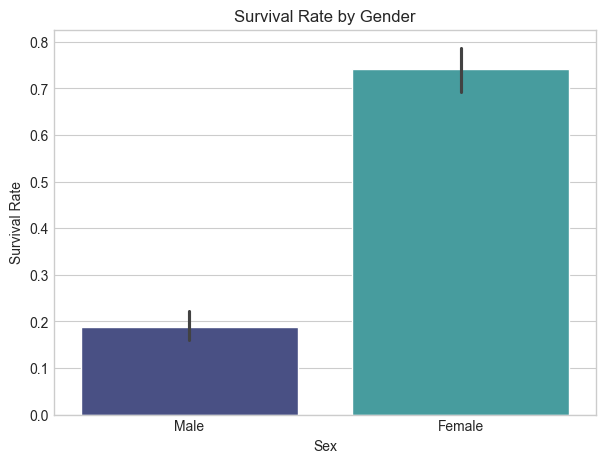

C:\Users\Nidhi K N\AppData\Local\Temp\ipykernel_25652\561115756.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=titanic_clean, palette="rocket")


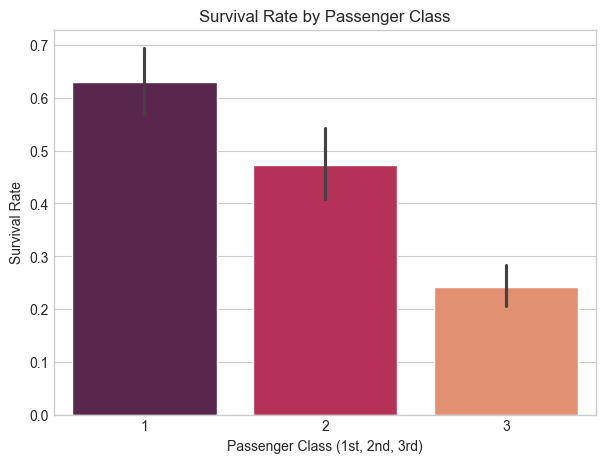

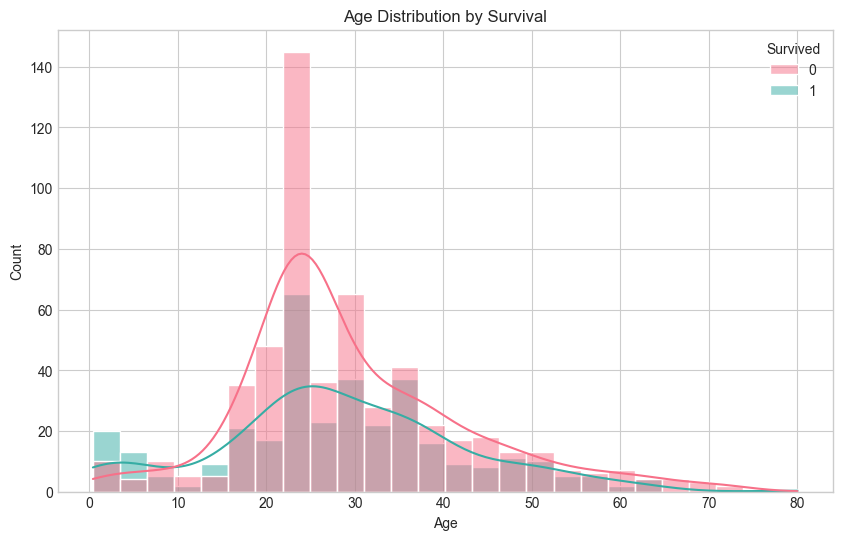

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the theme for the plots
sns.set_style("whitegrid")
plt.style.use("seaborn-v0_8-whitegrid")

# --- Plot 1: Survival Count ---
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=titanic_clean, palette="viridis")
plt.title('Survival Count (0 = No, 1 = Yes)')
plt.show()

# --- Plot 2: Survival Rate by Gender ---
plt.figure(figsize=(7, 5))
sns.barplot(x='Sex', y='Survived', data=titanic_clean, palette="mako")
plt.title('Survival Rate by Gender')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.ylabel('Survival Rate')
plt.show()

# --- Plot 3: Survival Rate by Passenger Class ---
plt.figure(figsize=(7, 5))
sns.barplot(x='Pclass', y='Survived', data=titanic_clean, palette="rocket")
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.xlabel('Passenger Class (1st, 2nd, 3rd)')
plt.show()

# --- Plot 4: Age Distribution of Survivors vs Non-Survivors ---
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic_clean, x='Age', hue='Survived', kde=True, palette="husl")
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()